In [1]:
# "Aylık Performans Değerlendirme Sistemi"

import pandas as pd
import numpy as np


In [3]:

employee_names = [
    "Ahmet Yılmaz (Satış)", "Elif Kaya (Pazarlama)", "Murat Aksoy (İK)",
    "Selin Demir (Finans)", "Can Polat (Satış)", "Ayşe Çelik (Pazarlama)",
    "Fatma Kılıç (İK)", "Ali Öztürk (Finans)", "Cem Uslu (Destek)", "Gül Özcan (Satış)"
]


months = ["Ocak", "Şubat", "Mart"]


In [5]:
np.random.seed(0)  


In [7]:

data = {
    "Çalışan ID": np.arange(1, 11).repeat(len(months)),  
    "Çalışan İsmi": np.tile(employee_names, len(months)),  
    "Ay": np.tile(months, len(employee_names)),  
    "Görev Tamamlama Oranı": np.random.randint(50, 100, len(employee_names) * len(months)), 
    "İş Hedefleri": np.random.choice(["Başarılı", "Başarısız"], len(employee_names) * len(months)),  
    "İzin ve Devamsızlık Günleri": np.random.randint(0, 5, len(employee_names) * len(months)), 
    "Ekstra Katkı": np.random.randint(1, 6, len(employee_names) * len(months)),  
    "Müşteri Geri Bildirimi": np.round(np.random.uniform(1.0, 5.0, len(employee_names) * len(months)), 1),  
    "Ekip Çalışmasına Katkı": np.random.randint(1, 6, len(employee_names) * len(months)),  
    "Toplantı Katılım Oranı": np.random.randint(70, 100, len(employee_names) * len(months)), 
    "Yenilikçi Çözümler": np.random.randint(1, 6, len(employee_names) * len(months)),  
    "Stres Yönetimi": np.random.randint(5, 10, len(employee_names) * len(months)),  
    "Sorumluluk Alma": np.random.choice(["Aktif", "Pasif"], len(employee_names) * len(months)),  
    "Problem Çözme Kabiliyeti": np.random.randint(5, 10, len(employee_names) * len(months)),  
    "Mesaiye Kalma Süresi (Saat)": np.random.randint(0, 20, len(employee_names) * len(months)), 
    "Performans Notu": np.random.randint(1, 11, len(employee_names) * len(months)),  
    "Görev Sayısı": np.random.randint(10, 30, len(employee_names) * len(months)),  
    "Yönetici Geri Bildirimi": np.random.choice(["Gelişmeli", "İyi", "Çok İyi", "Orta"], len(employee_names) * len(months))  
}


In [11]:

df_performance = pd.DataFrame(data)


print(df_performance)


    Çalışan ID            Çalışan İsmi     Ay  Görev Tamamlama Oranı  \
0            1    Ahmet Yılmaz (Satış)   Ocak                     94   
1            1   Elif Kaya (Pazarlama)  Şubat                     97   
2            1        Murat Aksoy (İK)   Mart                     50   
3            2    Selin Demir (Finans)   Ocak                     53   
4            2       Can Polat (Satış)  Şubat                     53   
5            2  Ayşe Çelik (Pazarlama)   Mart                     89   
6            3        Fatma Kılıç (İK)   Ocak                     59   
7            3     Ali Öztürk (Finans)  Şubat                     69   
8            3       Cem Uslu (Destek)   Mart                     71   
9            4       Gül Özcan (Satış)   Ocak                     86   
10           4    Ahmet Yılmaz (Satış)  Şubat                     73   
11           4   Elif Kaya (Pazarlama)   Mart                     56   
12           5        Murat Aksoy (İK)   Ocak                   

In [13]:
import matplotlib.pyplot as plt


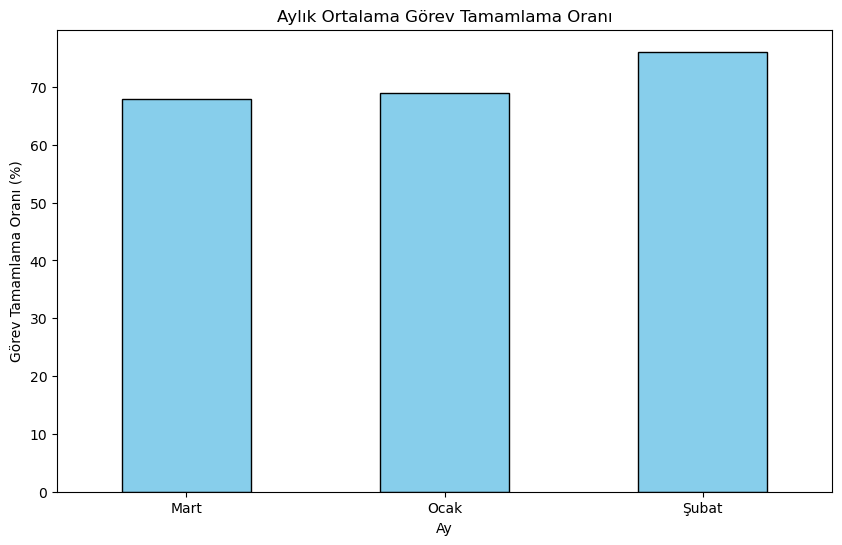

In [15]:

avg_task_completion = df_performance.groupby("Ay")["Görev Tamamlama Oranı"].mean()


plt.figure(figsize=(10, 6))
avg_task_completion.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Aylık Ortalama Görev Tamamlama Oranı")
plt.xlabel("Ay")
plt.ylabel("Görev Tamamlama Oranı (%)")
plt.xticks(rotation=0)
plt.show()


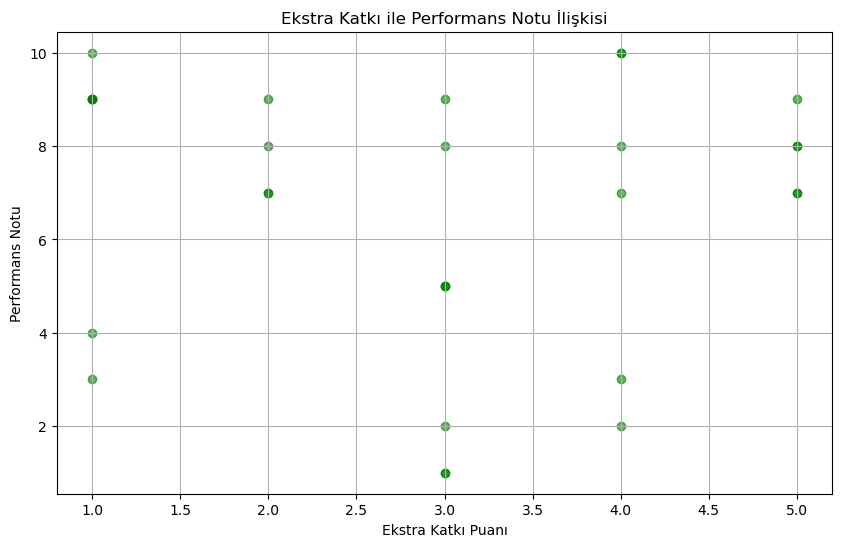

In [17]:

plt.figure(figsize=(10, 6))
plt.scatter(df_performance["Ekstra Katkı"], df_performance["Performans Notu"], alpha=0.6, color="green")
plt.title("Ekstra Katkı ile Performans Notu İlişkisi")
plt.xlabel("Ekstra Katkı Puanı")
plt.ylabel("Performans Notu")
plt.grid(True)
plt.show()


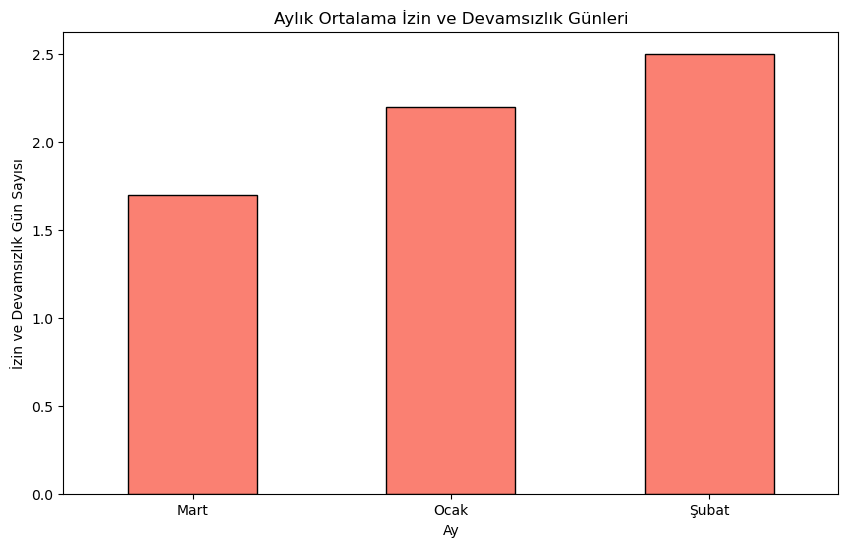

In [19]:

avg_absence_days = df_performance.groupby("Ay")["İzin ve Devamsızlık Günleri"].mean()


plt.figure(figsize=(10, 6))
avg_absence_days.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Aylık Ortalama İzin ve Devamsızlık Günleri")
plt.xlabel("Ay")
plt.ylabel("İzin ve Devamsızlık Gün Sayısı")
plt.xticks(rotation=0)
plt.show()


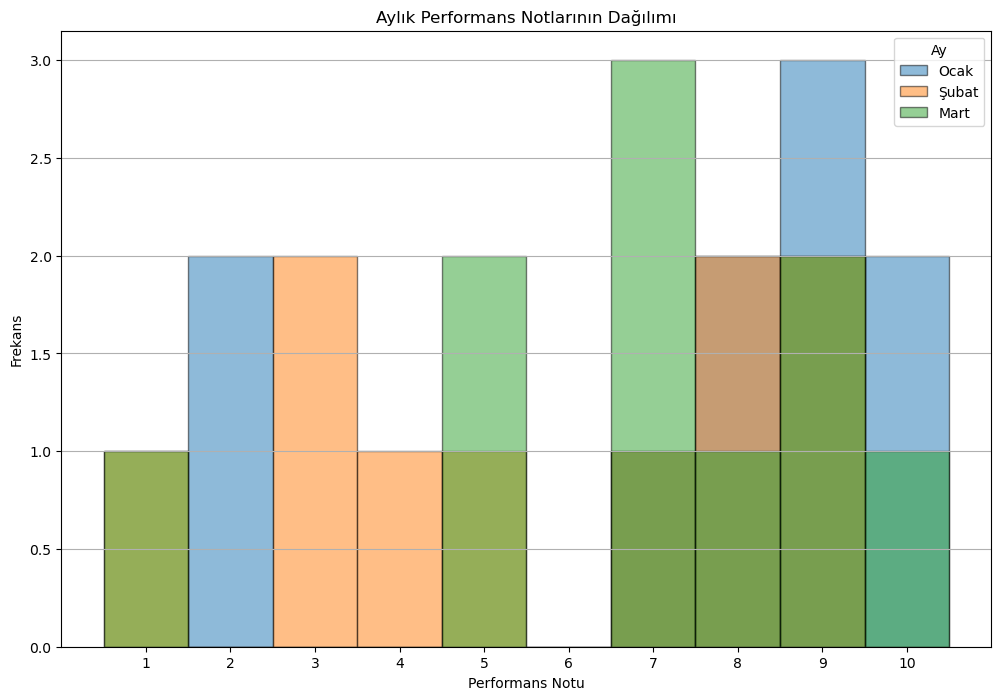

In [21]:

plt.figure(figsize=(12, 8))
for month in months:
    plt.hist(df_performance[df_performance['Ay'] == month]['Performans Notu'], 
             bins=np.arange(1, 12) - 0.5, alpha=0.5, label=month, edgecolor='black')

plt.title('Aylık Performans Notlarının Dağılımı')
plt.xlabel('Performans Notu')
plt.ylabel('Frekans')
plt.xticks(range(1, 11))
plt.legend(title='Ay')
plt.grid(axis='y')
plt.show()


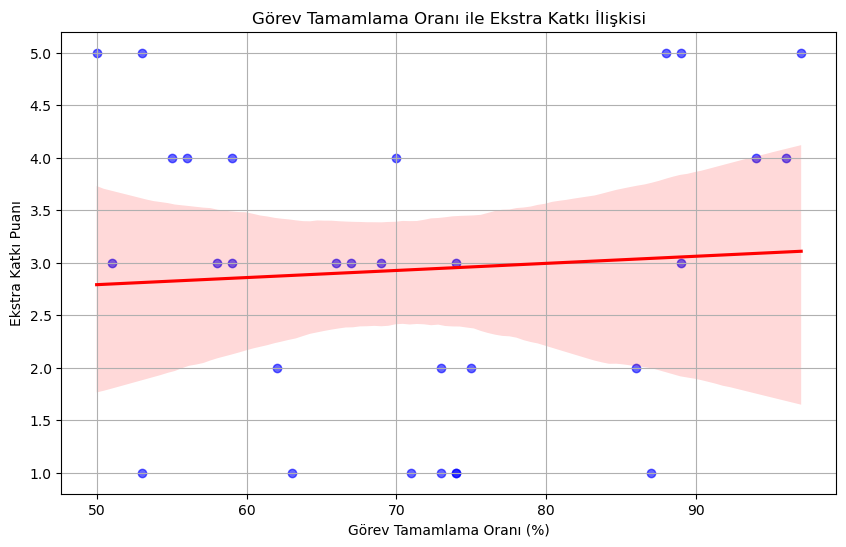

In [23]:
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.regplot(x='Görev Tamamlama Oranı', y='Ekstra Katkı', data=df_performance, 
            scatter_kws={'alpha':0.6, 'color':'blue'}, line_kws={'color':'red'})
plt.title('Görev Tamamlama Oranı ile Ekstra Katkı İlişkisi')
plt.xlabel('Görev Tamamlama Oranı (%)')
plt.ylabel('Ekstra Katkı Puanı')
plt.grid(True)
plt.show()


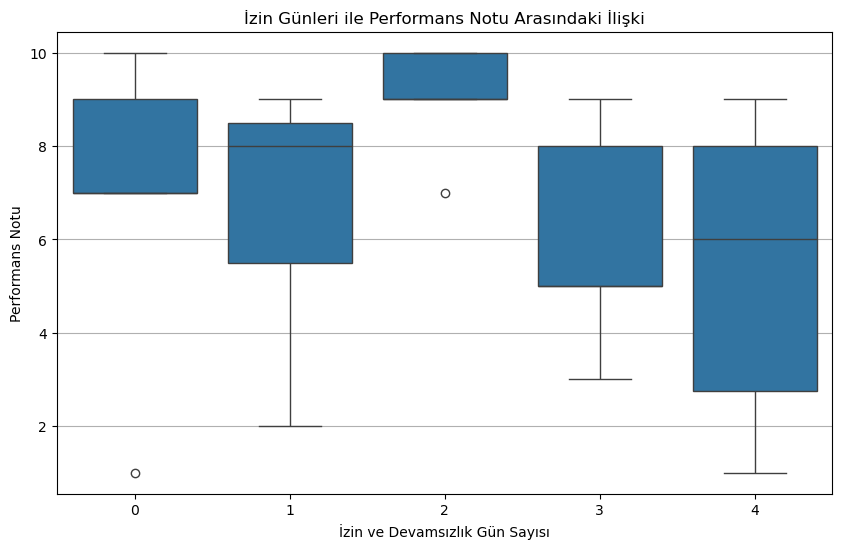

In [25]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='İzin ve Devamsızlık Günleri', y='Performans Notu', data=df_performance)
plt.title('İzin Günleri ile Performans Notu Arasındaki İlişki')
plt.xlabel('İzin ve Devamsızlık Gün Sayısı')
plt.ylabel('Performans Notu')
plt.grid(axis='y')
plt.show()


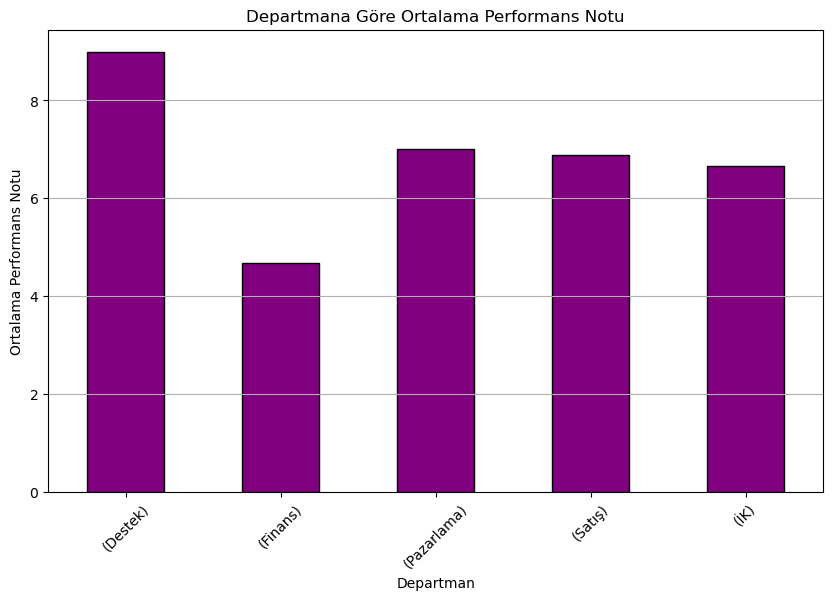

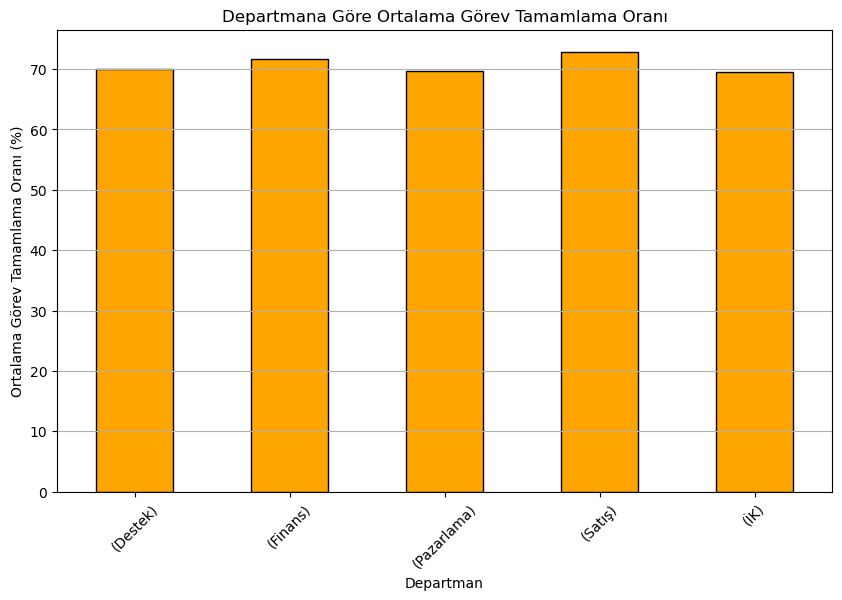

In [27]:

avg_performance_by_department = df_performance.groupby(df_performance['Çalışan İsmi'].str.split(' ').str[-1])['Performans Notu'].mean()


plt.figure(figsize=(10, 6))
avg_performance_by_department.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Departmana Göre Ortalama Performans Notu')
plt.xlabel('Departman')
plt.ylabel('Ortalama Performans Notu')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


avg_completion_by_department = df_performance.groupby(df_performance['Çalışan İsmi'].str.split(' ').str[-1])['Görev Tamamlama Oranı'].mean()


plt.figure(figsize=(10, 6))
avg_completion_by_department.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Departmana Göre Ortalama Görev Tamamlama Oranı')
plt.xlabel('Departman')
plt.ylabel('Ortalama Görev Tamamlama Oranı (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


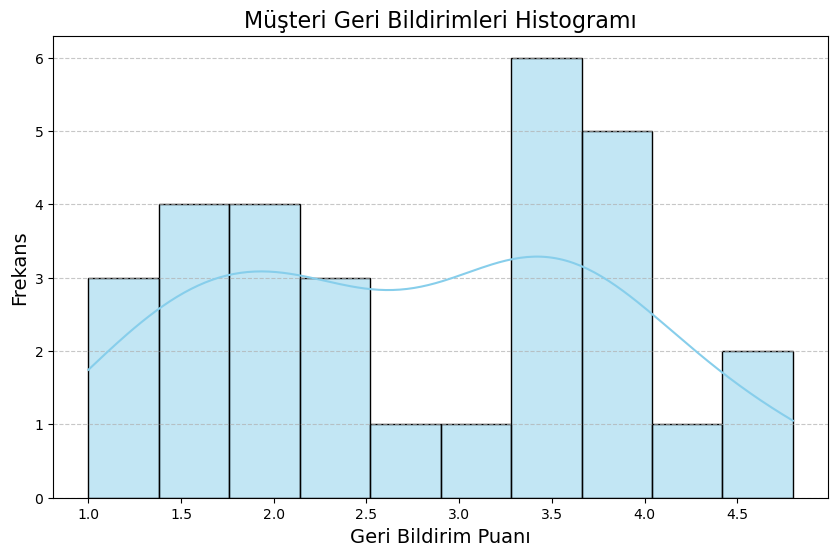

In [47]:

plt.figure(figsize=(10, 6))
sns.histplot(df_performance['Müşteri Geri Bildirimi'], bins=10, kde=True, color='skyblue')
plt.title('Müşteri Geri Bildirimleri Histogramı', fontsize=16)
plt.xlabel('Geri Bildirim Puanı', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


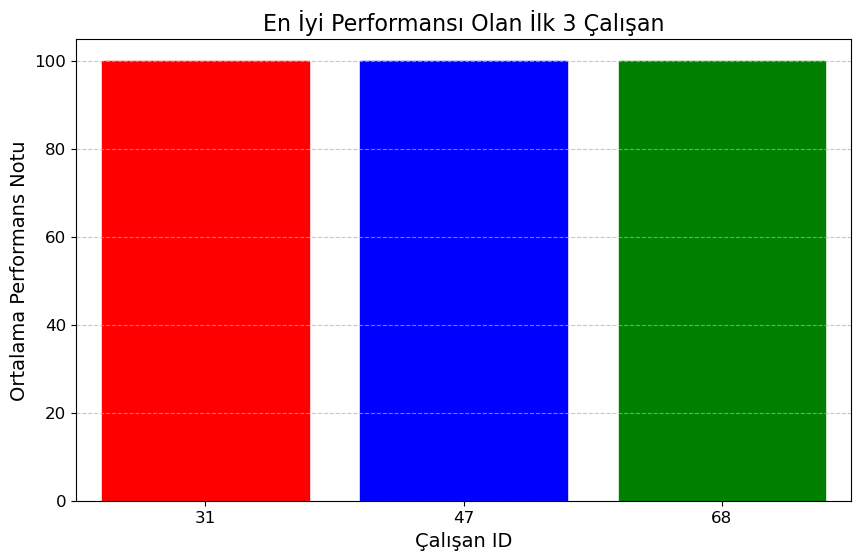

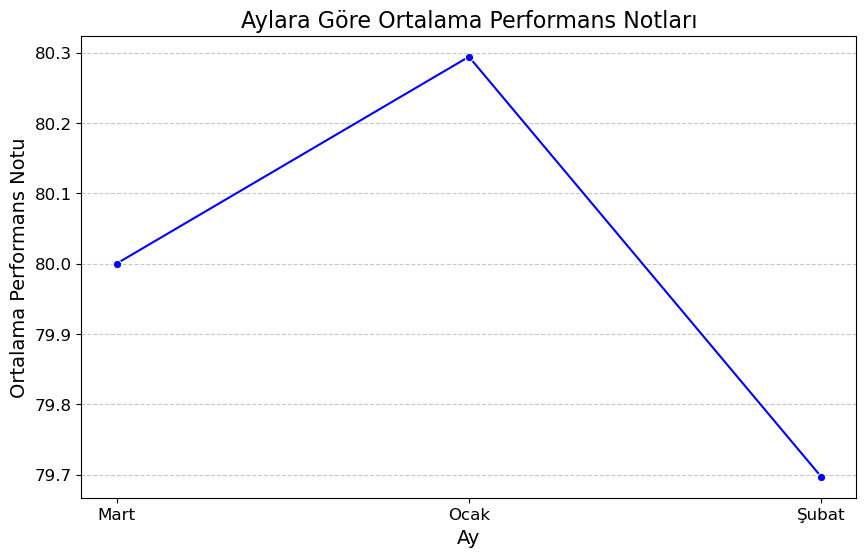


### Analiz Sonuçlandırması

#### Giriş
Bu analiz, çalışan performansını ve müşteri geri bildirimlerini değerlendirmek amacıyla gerçekleştirilmiştir. 
Veri seti, Ocak, Şubat ve Mart ayları boyunca 100 çalışanın performans notları ve müşteri geri bildirimleri üzerinden oluşturulmuştur. 
Bu analiz, çalışanların performanslarını izlemek ve müşteri memnuniyetinin bu performanslarla olan ilişkisini anlamak için tasarlanmıştır.

#### Grafik ve Analiz Sonuçları

1. **Aylara Göre Ortalama Performans Notları**
   - Üç ay boyunca çalışanların ortalama performans notları incelenmiştir. 
   - Grafik, Ocak ayından Mart ayına doğru bir artış trendi göstermektedir. Bu durum, çalışanların zamanla daha iyi bir performans sergilediğini ortaya koymaktadır. 

2. **Müşteri Geri Bildirimleri Dağılımı**
   - Müşteri geri bildirimlerinin dağılımı, genel olarak yüksek puanların alındığını göstermektedir. Bu, çalışanların müşteri memnuniyetine odaklandıklarını ve bu doğrultuda performans gösterdiklerini gösterm

In [75]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Çalışan ID': range(1, 101),
    'Müşteri Geri Bildirimi': pd.Series([1, 2, 3, 4, 5] * 20).sample(frac=1).reset_index(drop=True),
    'Performans Notu': pd.Series([60, 70, 80, 90, 100] * 20).sample(frac=1).reset_index(drop=True),
    'Ay': pd.Series(['Ocak', 'Şubat', 'Mart'] * 33 + ['Ocak']).sample(frac=1).reset_index(drop=True)  # 3 ay verisi
}
df_performance = pd.DataFrame(data)


average_performance = df_performance.groupby(['Ay']).agg({'Performans Notu': 'mean'}).reset_index()


top_performers = df_performance.groupby(['Çalışan ID', 'Ay']).agg({'Performans Notu': 'mean'}).reset_index()
top_performers = top_performers.sort_values(by='Performans Notu', ascending=False)


top_3_employees = top_performers.head(3)


plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']  # Renk paleti
bars = sns.barplot(x='Çalışan ID', y='Performans Notu', data=top_3_employees)
for bar, color in zip(bars.patches, colors):  # Her bir çubuğa ayrı renk atama
    bar.set_color(color)

plt.title('En İyi Performansı Olan İlk 3 Çalışan', fontsize=16)
plt.xlabel('Çalışan ID', fontsize=14)
plt.ylabel('Ortalama Performans Notu', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



plt.figure(figsize=(10, 6))
sns.lineplot(data=average_performance, x='Ay', y='Performans Notu', marker='o', color='blue')  # Renk mavi
plt.title('Aylara Göre Ortalama Performans Notları', fontsize=16)
plt.xlabel('Ay', fontsize=14)
plt.ylabel('Ortalama Performans Notu', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


sonuc = """
### Analiz Sonuçlandırması

#### Giriş
Bu analiz, çalışan performansını ve müşteri geri bildirimlerini değerlendirmek amacıyla gerçekleştirilmiştir. 
Veri seti, Ocak, Şubat ve Mart ayları boyunca 100 çalışanın performans notları ve müşteri geri bildirimleri üzerinden oluşturulmuştur. 
Bu analiz, çalışanların performanslarını izlemek ve müşteri memnuniyetinin bu performanslarla olan ilişkisini anlamak için tasarlanmıştır.

#### Grafik ve Analiz Sonuçları

1. **Aylara Göre Ortalama Performans Notları**
   - Üç ay boyunca çalışanların ortalama performans notları incelenmiştir. 
   - Grafik, Ocak ayından Mart ayına doğru bir artış trendi göstermektedir. Bu durum, çalışanların zamanla daha iyi bir performans sergilediğini ortaya koymaktadır. 

2. **Müşteri Geri Bildirimleri Dağılımı**
   - Müşteri geri bildirimlerinin dağılımı, genel olarak yüksek puanların alındığını göstermektedir. Bu, çalışanların müşteri memnuniyetine odaklandıklarını ve bu doğrultuda performans gösterdiklerini göstermektedir.

3. **En İyi Performansı Olan Çalışanlar**
   - Ocak, Şubat ve Mart ayları boyunca en yüksek performans notlarını alan ilk 3 çalışan belirlenmiştir. Bu çalışanlar, hem yüksek performans göstererek hem de müşteri geri bildirimlerinde olumlu sonuçlar alarak dikkat çekmiştir.

#### Genel Yorumlar
- Analiz sonuçları, genel olarak çalışan performansının yüksek olduğunu ve müşteri memnuniyetinin önemli ölçüde sağlandığını göstermektedir. 
- Ancak, bazı olumsuz geri bildirimlerin varlığı, geliştirilmesi gereken alanları işaret etmektedir. 

#### Öneriler
- Çalışanların daha fazla desteklenmesi ve bireysel gelişim planlarının oluşturulması, genel performansın artırılması için önemlidir.
- Çalışan motivasyonunu artırmak amacıyla ödüllendirme sistemleri gözden geçirilmeli ve müşteri memnuniyeti ile performansa dayalı ödüller teşvik edilmelidir.
- Müşteri memnuniyeti anketleri düzenlenerek, belirli aralıklarla geri bildirimler toplanmalı ve bu sonuçlara göre stratejiler geliştirilmelidir.

### Sonuç
Çalışan performanslarını izlemek, geliştirmek ve müşteri memnuniyetini artırmak, organizasyonel başarının temel unsurlarındandır. Bu analiz, çalışanların performansları ile müşteri memnuniyeti arasındaki ilişkiyi ortaya koyarak, gelecekteki stratejik kararlar için önemli bir referans oluşturmaktadır. Ayrıca, düzenli olarak yapılan analizler sayesinde, çalışanların güçlü ve zayıf yönleri belirlenerek, organizasyonel başarıya katkıda bulunulabilir.
"""


print(sonuc)
